# Comparing three algorithms on three instance of TSP

- Cost over generations, one file per algorithm
- Values logged per generation: Generation, Best Cost, Number of evaluations
- Values averaged over 10 runs + Min/Max values per run
- Values logged per run: Run, Generation, Avg Cost, Best Cost, Worst Cost, Number of evaluations
- Values aggregated over Generations: Generation, Avg(Avg Cost), Avg(Best Cost), Avg(Worst Cost), Avg(Number of evaluations)

## Values logged per run: Run, Generation, Avg Cost, Best Cost, Worst Cost, Number of evaluations

| Run | Generation | Avg Cost per generation | Best Cost per generation | Worst Cost per generation | Number of evaluations |
|-----|------------|----------|----------|----------|-----------------------|
| 0   | 0          | 0.0      | 0.0      | 0.0      | 0                     |
| 0   | 1          | 0.0      | 0.0      | 0.0      | 0                     |
| 0   | 2          | 0.0      | 0.0      | 0.0      | 0                     |
| 1  | 0          | 0.0      | 0.0      | 0.0      | 0                     |
| 1  | 1          | 0.0      | 0.0      | 0.0      | 0                     |
| 1  | 2          | 0.0      | 0.0      | 0.0      | 0                     |
| 2  | 0          | 0.0      | 0.0      | 0.0      | 0                     |
| 2  | 1          | 0.0      | 0.0      | 0.0      | 0                     |
| 2  | 2          | 0.0      | 0.0      | 0.0      | 0                     |

## Values aggregated over Generations: Generation, Avg(Avg Cost), Avg(Best Cost), Avg(Worst Cost), Avg(Number of evaluations)

| Generation | Avg(Avg Cost) | Avg(Best Cost) | Avg(Worst Cost) | Avg(Number of evaluations) |
|------------|---------------|---------------|---------------|----------------------------|
| 0          | 0.0           | 0.0           | 0.0           | 0.0                        |
| 1          | 0.0           | 0.0           | 0.0           | 0.0                        |
| 2          | 0.0           | 0.0           | 0.0           | 0.0                        |

SQL:  
```sql
SELECT
    Generation,
    AVG(AvgCost) AS AvgAvgCost,
    AVG(BestCost) AS AvgBestCost,
    AVG(WorstCost) AS AvgWorstCost,
    AVG(NumEvals) AS AvgNumEvals

FROM
FirstTable

GROUP BY
Generation
```

Python:  
```python
data = pd.read_csv('ants.csv')
aggregate = data.groupby('Generation').mean()
```

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# results folder
results_folder = 'Results'
class Algos:
    ACO = "ACO"
    firefly = "FA"
    AOF = "AOF"

algorithms = [Algos.ACO, Algos.firefly, Algos.AOF]
problems = ["wi29", "qa194", "uy734"]
optimal_solutions = [27603, 9352, 79114]

# Raw data: all algorithms for all problems
raw_data = {}

# Averaged over all runs for more accurate results
average_data_over_runs = {}

# Values of last generation per run: Run, Generation, Best Cost, Average Cost, Worst Cost, Number of evaluations
result_per_run = {}

for algo in algorithms:
    raw_data[algo] = {}
    average_data_over_runs[algo] = {}
    result_per_run[algo] = {}

    for problem in problems:
        filename = f"{algo}_{problem}.csv"
        file_path = os.path.join(results_folder, filename)
        raw_data[algo][problem] = pd.read_csv(file_path)

        # Values aggregated over Generations: Generation, Avg(Average Cost), Avg(Best Cost), Avg(Worst Cost), Avg(Number of evaluations)
        average_data_over_runs[algo][problem] = raw_data[algo][problem].groupby('Generation').mean().drop(columns='Run')

        # Values of last generation per run: Run, Best Cost, Average Cost, Worst Cost, Number of evaluations
        result_per_run[algo][problem] = raw_data[algo][problem].groupby('Run').last()

In [47]:
def plot_single_algorithm(data: pd.DataFrame, algorithm: str, problem: str, optimum: int, colors: list[str]):
    plt.plot(data.index, data['Best Cost'], label='Best Cost', color=colors[0], linestyle='--')
    plt.plot(data.index, data['Average Cost'], label='Avg Cost', color=colors[1])
    plt.plot(data.index, data['Worst Cost'], label='Worst Cost', color=colors[2], linestyle='-.')
    plt.axhline(y=optimum, color='g', linestyle='-', label='Optimum')
    plt.title(f"{algorithm} on {problem}")
    plt.xscale('log')
    plt.xlabel('Generation', fontsize=13)
    plt.ylabel('Cost' ,fontsize=13)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

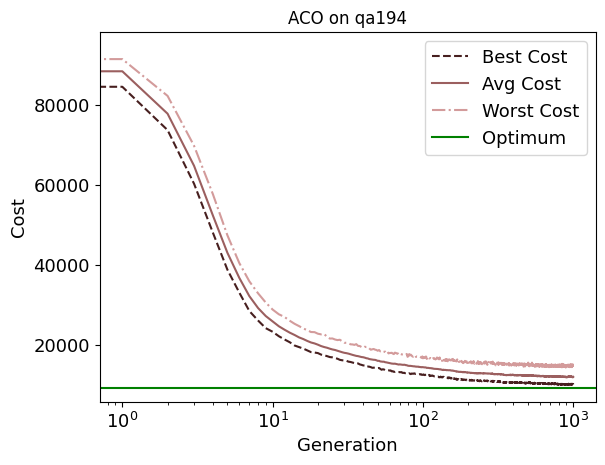

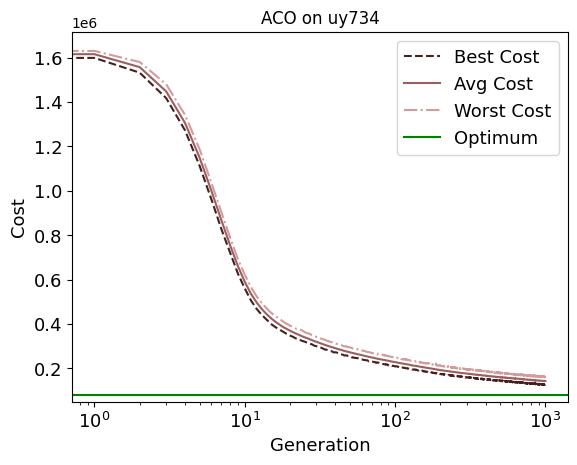

In [48]:
plot_single_algorithm(average_data_over_runs[Algos.ACO]["qa194"], "ACO", "qa194", 9352, ["#471F1F", "#9B5F5F", "#D39B9B"])
plot_single_algorithm(average_data_over_runs[Algos.ACO]["uy734"], "ACO", "uy734", 79114, ["#471F1F", "#9B5F5F", "#D39B9B"])

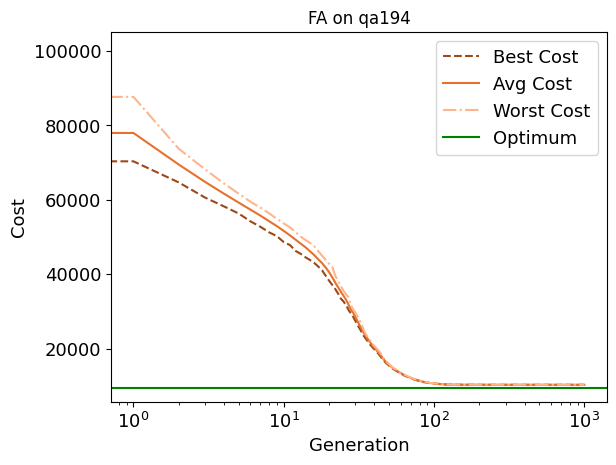

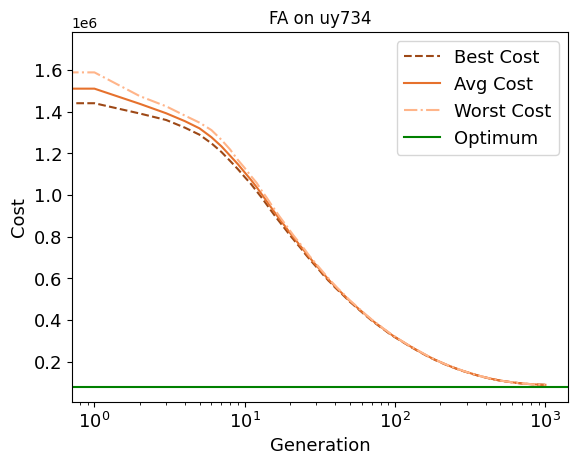

In [49]:
plot_single_algorithm(average_data_over_runs[Algos.firefly]["qa194"], "FA", "qa194", 9352, ["#9D4816", "#E6712D", "#FFB58A"])
plot_single_algorithm(average_data_over_runs[Algos.firefly]["uy734"], "FA", "uy734", 79114, ["#9D4816", "#E6712D", "#FFB58A"])

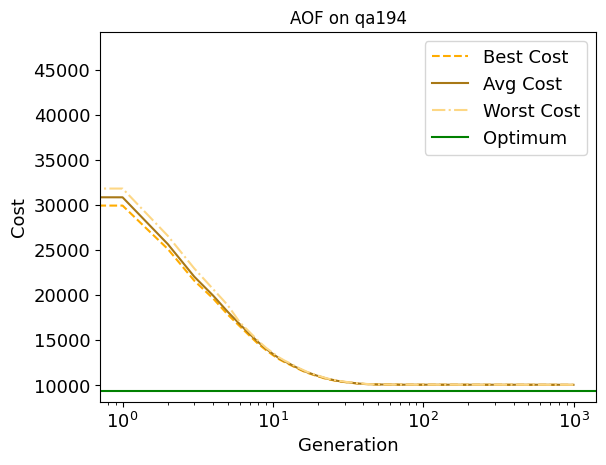

In [7]:
plot_single_algorithm(average_data_over_runs[Algos.AOF]["qa194"], "AOF", "qa194", 9352, ["#FFAC00", "#A87816", "#FDD785"])

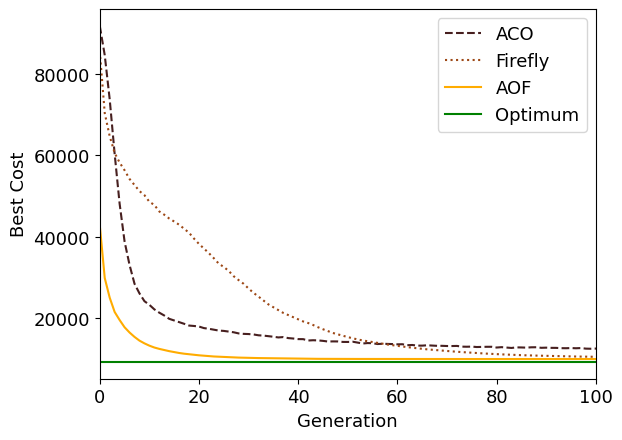

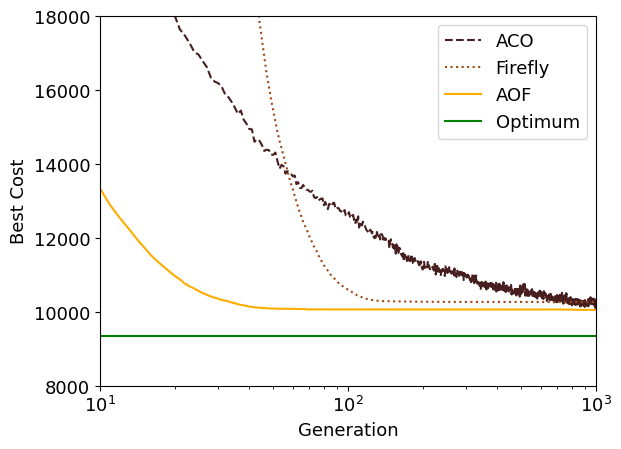

ACO on wi29: 27603
ACO on qa194: 9697
ACO on uy734: 125138
FA on wi29: 27603
FA on qa194: 10060
FA on uy734: 87625
AOF on wi29: 27603
AOF on qa194: 10070
AOF on uy734: 84879


In [52]:
# Plot min cost + optimum over logarithmic generations
plt.plot(average_data_over_runs[Algos.ACO]["qa194"].index, average_data_over_runs[Algos.ACO]["qa194"]['Best Cost'], label='ACO', color='#471F1F', linestyle='--')
plt.plot(average_data_over_runs[Algos.firefly]["qa194"].index, average_data_over_runs[Algos.firefly]["qa194"]['Best Cost'], label='Firefly', color='#9D4816', linestyle=':')
plt.plot(average_data_over_runs[Algos.AOF]["qa194"].index, average_data_over_runs[Algos.AOF]["qa194"]['Best Cost'], label='AOF', color='#FFAC00')
plt.plot(average_data_over_runs[Algos.ACO]["qa194"].index, [optimal_solutions[1]]*len(average_data_over_runs[Algos.ACO]["qa194"].index), label='Optimum',color='g')

#plt.xscale('log')
plt.xlabel('Generation',fontsize=13)
plt.ylabel('Best Cost', fontsize=13)
plt.xlim(0, 100)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(fontsize=13)
plt.show()
# restrict y axis to 0-10000
plt.plot(average_data_over_runs[Algos.ACO]["qa194"].index, average_data_over_runs[Algos.ACO]["qa194"]['Best Cost'], label='ACO', color='#471F1F', linestyle='--')
plt.plot(average_data_over_runs[Algos.firefly]["qa194"].index, average_data_over_runs[Algos.firefly]["qa194"]['Best Cost'], label='Firefly', color='#9D4816', linestyle=':')
plt.plot(average_data_over_runs[Algos.AOF]["qa194"].index, average_data_over_runs[Algos.AOF]["qa194"]['Best Cost'], label='AOF', color='#FFAC00')
plt.plot(average_data_over_runs[Algos.ACO]["qa194"].index, [optimal_solutions[1]]*len(average_data_over_runs[Algos.ACO]["qa194"].index), label='Optimum', color='g')
plt.xscale('log')
plt.xlabel('Generation', fontsize=13)
plt.ylabel('Best Cost', fontsize=13)
plt.xlim(10, 1000)
plt.ylim(8000, 18000)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

# What is the best solution found by each algorithm?
for algo in algorithms:
    for problem in problems:
        print(f"{algo} on {problem}: {result_per_run[algo][problem]['Best Cost'].min()}")

    


Algorithm: ACO


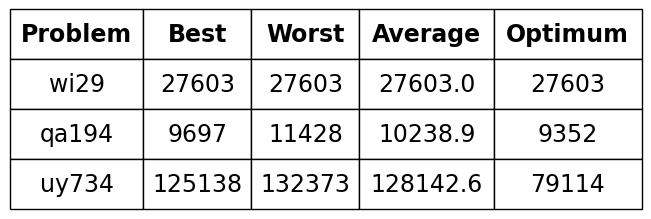


Algorithm: FA


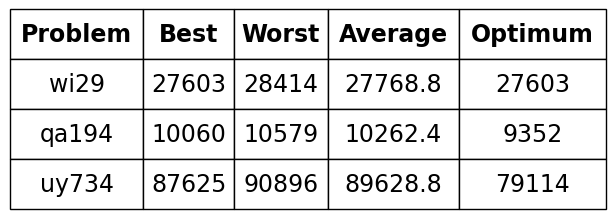


Algorithm: AOF


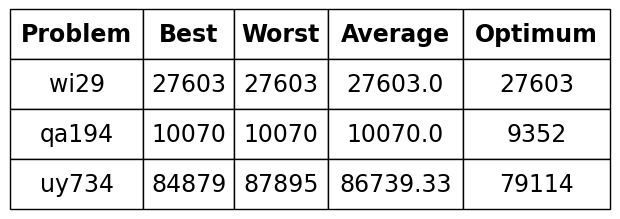

In [38]:
import matplotlib.pyplot as plt

# Function to print table using matplotlib
def print_table(data, title: str|None = None):
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=data.values, colLabels=data.columns, cellLoc='center', loc='center')
    table.auto_set_column_width(col=list(range(len(data.columns))))
    table.auto_set_font_size(False)
    table.set_fontsize(17)
    table.scale(1, 3)
    for j in range(len(data.columns)):
        table[0, j].set_text_props(weight='bold')  # Fett formatieren

    if title:
        plt.title(title)

    plt.tight_layout(pad=0)
    plt.show()

# Print the tables for each algorithm
for algo in algorithms:
    print(f"\nAlgorithm: {algo}")
    table_data = []
    table_columns = ['Problem', 'Best', 'Worst', 'Average', 'Optimum']

    for problem, optimum in zip(problems, optimal_solutions):
        table_data.append([
            problem,
            result_per_run[algo][problem]['Best Cost'].min(),
            result_per_run[algo][problem]['Best Cost'].max(),
            round(result_per_run[algo][problem]['Best Cost'].mean(), 2),
            optimum
        ])


    print_table(pd.DataFrame(table_data, columns=table_columns))


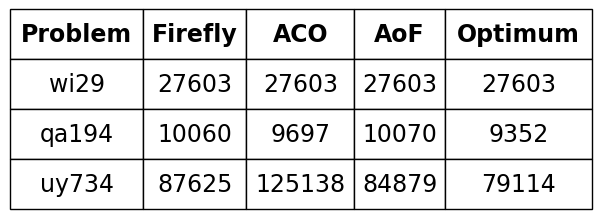

In [40]:
# One table to rule them all
table_data = []
title = "Best Results"
table_columns = ['Problem', 'Firefly', 'ACO', 'AoF', 'Optimum']

for problem, optimum in zip(problems, optimal_solutions):
    table_data.append([
        problem,
        result_per_run[Algos.firefly][problem]['Best Cost'].min(),
        result_per_run[Algos.ACO][problem]['Best Cost'].min(),
        result_per_run[Algos.AOF][problem]['Best Cost'].min(),
        optimum
    ])

print_table(pd.DataFrame(table_data, columns=table_columns))

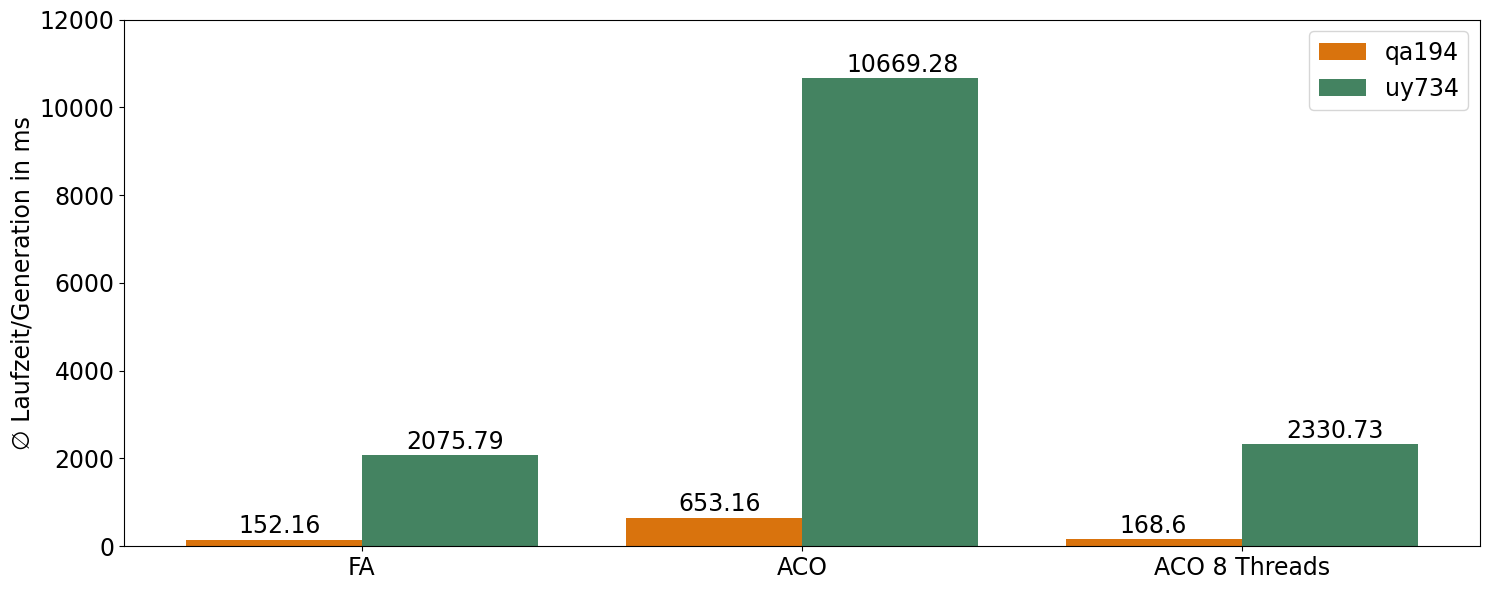

In [11]:
plt.figure(figsize=(15, 6))
df = pd.read_csv("Results/laufzeit.csv")

algorithmen = df["Algorithmus"]
#wi29 = df["wi29"]
qa194 = df["qa194"]
uy734 = df["uy734"]

bar_width = 0.4
index = np.arange(len(algorithmen))

#plt.bar(index, wi29, width=bar_width, label="wi29", color="#FF0000")  # Rot
plt.bar(index + bar_width, qa194, width=bar_width, label="qa194", color="#D9730D")  # Grün
plt.bar(index + 2 * bar_width, uy734, width=bar_width, label="uy734", color="#448361")  # Blau

for i in range(len(algorithmen)):
    #plt.text(index[i] - 0.03, wi29[i] + 0.5, str(wi29[i]), color='black')
    plt.text(index[i] + bar_width/1.25, qa194[i]+300, str(qa194[i]), color='black', va='center', fontsize=17)
    plt.text(index[i] + 1.75 * bar_width, uy734[i]+300, str(uy734[i]), color='black', va='center', fontsize=17)

plt.ylabel("∅ Laufzeit/Generation in ms", fontsize=17)
plt.ylim(0, 12000)
plt.xticks(index + bar_width*1.5, algorithmen, fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=17)

plt.tight_layout()
plt.show()

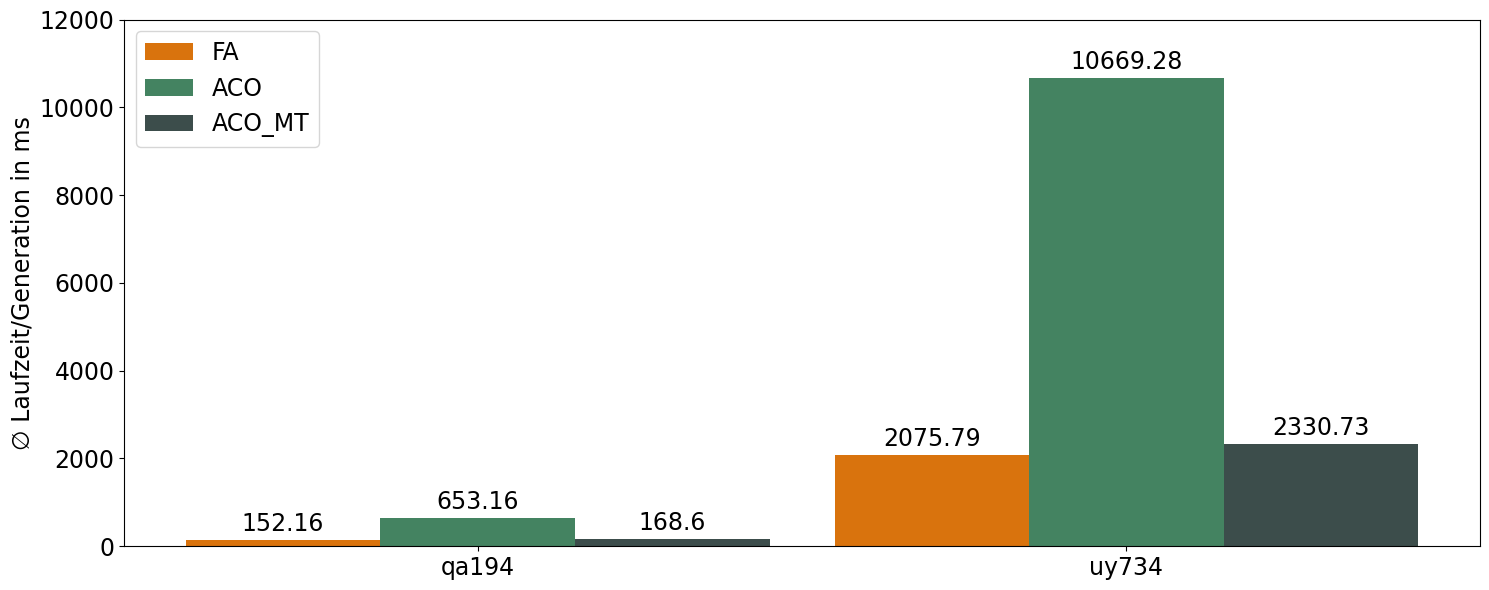

In [12]:
plt.figure(figsize=(15, 6))
df = pd.read_csv("Results/laufzeit_t.csv")

algorithmen = df["Problem"]
fa = df["FA"]
aco = df["ACO"]
aco_mt = df["ACO_MT"]

bar_width = 0.3
index = np.arange(len(algorithmen))

plt.bar(index - bar_width, fa, width=bar_width, label="FA", color="#D9730D")  # Grün
plt.bar(index, aco, width=bar_width, label="ACO", color="#448361")  # Blau
plt.bar(index + bar_width, aco_mt, width=bar_width, label="ACO_MT", color="#3c4d4b")  # Rot

plt.ylabel("∅ Laufzeit/Generation in ms", fontsize=17)
plt.ylim(0, 12000)

# Erhöhen Sie den Abstand zwischen den Beschriftungen auf der x-Achse
plt.xticks(index, algorithmen, fontsize=17)

plt.yticks(fontsize=17)

for i, value in enumerate(fa):
    plt.text(i - bar_width, value + 200, str(value), color='black', ha='center', fontsize=17)
for i, value in enumerate(aco):
    plt.text(i, value + 200, str(value), color='black', ha='center', fontsize=17)
for i, value in enumerate(aco_mt):
    plt.text(i + bar_width, value + 200, str(value), color='black', ha='center', fontsize=17)

plt.legend(fontsize=17, loc='upper left')  # Legende auf der linken Seite

plt.tight_layout()
plt.show()
